In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse
pd.set_option('max_columns', 100)
pd.set_option('max_colwidth', 100)
warnings.filterwarnings('ignore')

%matplotlib inline

# 数据观察

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
test = pd.read_csv('data/test.csv')

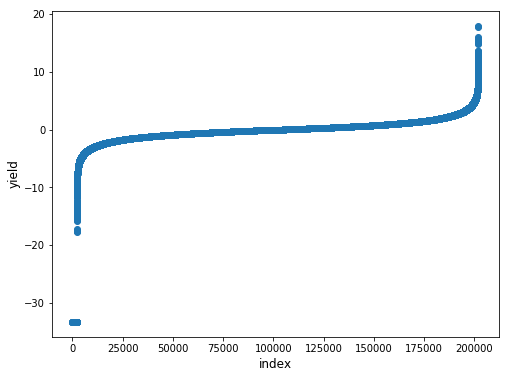

In [4]:
target_col = "target"

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('yield', fontsize=12)
plt.show()

In [80]:
train[train['target']<-20]['target'].value_counts()

-33.219281    2207
Name: target, dtype: int64

In [81]:
states = []
for col in train.columns:
    states.append((col, train[col].nunique(), train[col].isnull().sum()/train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0], train[col].dtype))
state_df = pd.DataFrame(states, columns=['Feature', 'Unique values', 'Missing values', 'Percentage of biggest category', 'type'])
state_df.sort_values('Percentage of biggest category', ascending=False)

,Feature,Unique values,Missing values,Percentage of biggest category,type
4,feature_3,2,0.0,0.565569,int64
3,feature_2,3,0.0,0.441974,int64
2,feature_1,5,0.0,0.364372,int64
0,first_active_month,75,0.0,0.068731,object
5,target,197110,0.0,0.010930,float64
1,card_id,201917,0.0,0.000005,object


In [82]:
states = []
for col in test.columns:
    states.append((col, test[col].nunique(), test[col].isnull().sum()/test.shape[0], test[col].value_counts(normalize=True, dropna=False).values[0], test[col].dtype))
state_df = pd.DataFrame(states, columns=['Feature', 'Unique values', 'Missing values', 'Percentage of biggest category', 'type'])
state_df.sort_values('Percentage of biggest category', ascending=False)

,Feature,Unique values,Missing values,Percentage of biggest category,type
4,feature_3,2,0.000000,0.564377,int64
3,feature_2,3,0.000000,0.443081,int64
2,feature_1,5,0.000000,0.361737,int64
0,first_active_month,75,0.000008,0.071225,object
1,card_id,123623,0.000000,0.000008,object


In [83]:
for col in ['feature_3', 'feature_2', 'feature_3']:
    print('This is ' + col)
    print(train[col].value_counts())

This is feature_3
1    114198
0     87719
Name: feature_3, dtype: int64
This is feature_2
1    89242
2    74839
3    37836
Name: feature_2, dtype: int64
This is feature_3
1    114198
0     87719
Name: feature_3, dtype: int64


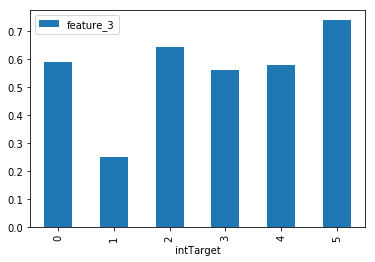

In [112]:
train['intTarget'] = pd.cut(train['target'], 6, labels=False)
train[['feature_3', 'intTarget']].groupby('intTarget').mean().plot.bar()

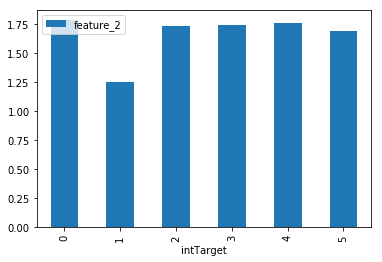

In [105]:
train[['feature_2', 'intTarget']].groupby('intTarget').mean().plot.bar()

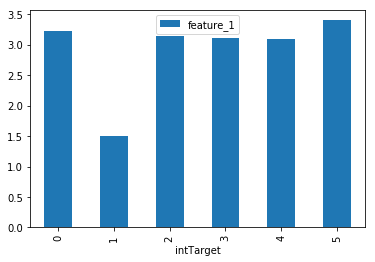

In [106]:
train[['feature_1', 'intTarget']].groupby('intTarget').mean().plot.bar()

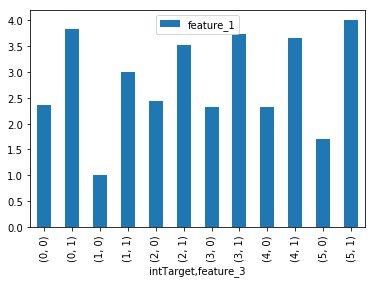

In [107]:
train[['feature_1','feature_3', 'intTarget']].groupby(['intTarget', 'feature_3']).mean().plot.bar()

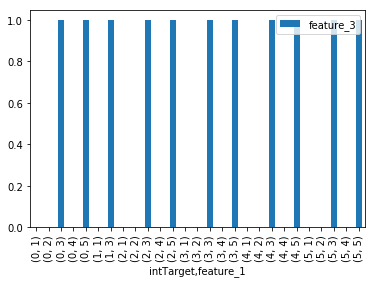

In [109]:
train[['feature_1','feature_3', 'intTarget']].groupby(['intTarget', 'feature_1']).mean().plot.bar()

# 数据处理 特征工程

**合并训练集测试集**

In [16]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
test['first_active_month'] = test['first_active_month'].fillna('2017-09')

In [6]:
train_y = train['target']
train = train.drop('target', axis=1)
train_len = len(train)

In [7]:
data = pd.concat([train, test], axis=0)

把训练集测试集的时间换算成月

In [8]:
def time_to_month(x):
    year, month = x.split('-')
    time = int(year)*12 + int(month)
    return time

In [9]:
data['first_active_month'] = data['first_active_month'].apply(time_to_month)
min_time = min(data['first_active_month'])
data['first_active_month'] -= min_time

onehot处理

In [22]:
# category_features = ['feature_1', 'feature_2', 'feature_3']

In [23]:
# for col in category_features:
#     dummy = pd.get_dummies(data[col], prefix=col, prefix_sep='_')
#     data = pd.concat([data, dummy], axis=1)

# 与其他文件结合

In [10]:
card_feature = pd.read_csv('data/card_feature.csv')
city_feature = pd.read_csv('data/city_feature.csv')
category_feature = pd.read_csv('data/category_feature.csv')
subsector_feature = pd.read_csv('data/subsector_feature.csv')
state_feature = pd.read_csv('data/state_feature.csv')
day_feature = pd.read_csv('data/day_feature.csv')
month_feature = pd.read_csv('data/month_feature.csv')
second_feature = pd.read_csv('data/second_feature.csv')
installments_feature = pd.read_csv('data/installments_feature.csv')
purchase_feature = pd.read_csv('data/purchase_feature.csv')
install_purchase_feature = pd.read_csv('data/install_purchase_feature.csv')
category_1_feature = pd.read_csv('data/category_1_feature.csv')
category_2_feature = pd.read_csv('data/category_2_feature.csv')
category_3_feature = pd.read_csv('data/category_3_feature.csv')
authorized_feature = pd.read_csv('data/authorized_feature.csv')
month_lag_feature = pd.read_csv('data/month_lag_feature.csv')

In [11]:
new_card_feature = pd.read_csv('data/new_card_feature.csv')
new_city_feature = pd.read_csv('data/new_city_feature.csv')
new_category_feature = pd.read_csv('data/new_category_feature.csv')
new_subsector_feature = pd.read_csv('data/new_subsector_feature.csv')
new_state_feature = pd.read_csv('data/new_state_feature.csv')
new_day_feature = pd.read_csv('data/new_day_feature.csv')
new_month_feature = pd.read_csv('data/new_month_feature.csv')
new_installments_feature = pd.read_csv('data/new_installments_feature.csv')
new_purchase_feature = pd.read_csv('data/new_purchase_feature.csv')
new_install_purchase_feature = pd.read_csv('data/new_install_purchase_feature.csv')
new_category_1_feature = pd.read_csv('data/new_category_1_feature.csv')
new_category_2_feature = pd.read_csv('data/new_category_2_feature.csv')
new_category_3_feature = pd.read_csv('data/new_category_3_feature.csv')
new_authorized_feature = pd.read_csv('data/new_authorized_feature.csv')
new_month_lag_feature = pd.read_csv('data/new_month_lag_feature.csv')

In [12]:
data = pd.merge(data, card_feature, on='card_id', how='left')
data = pd.merge(data, city_feature, on='card_id', how='left')
data = pd.merge(data, category_feature, on='card_id', how='left')
data = pd.merge(data, subsector_feature, on='card_id', how='left')
data = pd.merge(data, state_feature, on='card_id', how='left')
data = pd.merge(data, day_feature, on='card_id', how='left')
data = pd.merge(data, month_feature, on='card_id', how='left')
data = pd.merge(data, second_feature, on='card_id', how='left')
data = pd.merge(data, installments_feature, on='card_id', how='left')
data = pd.merge(data, purchase_feature, on='card_id', how='left')
data = pd.merge(data, install_purchase_feature, on='card_id', how='left')
data = pd.merge(data, category_1_feature, on='card_id', how='left')
data = pd.merge(data, category_2_feature, on='card_id', how='left')
data = pd.merge(data, category_3_feature, on='card_id', how='left')
data = pd.merge(data, authorized_feature, on='card_id', how='left')
data = pd.merge(data, month_lag_feature, on='card_id', how='left')

In [13]:
data = pd.merge(data, new_card_feature, on='card_id', how='left')
data = pd.merge(data, new_city_feature, on='card_id', how='left')
data = pd.merge(data, new_category_feature, on='card_id', how='left')
data = pd.merge(data, new_subsector_feature, on='card_id', how='left')
data = pd.merge(data, new_state_feature, on='card_id', how='left')
data = pd.merge(data, new_day_feature, on='card_id', how='left')
data = pd.merge(data, new_month_feature, on='card_id', how='left')
data = pd.merge(data, new_installments_feature, on='card_id', how='left')
data = pd.merge(data, new_purchase_feature, on='card_id', how='left')
data = pd.merge(data, new_install_purchase_feature, on='card_id', how='left')
data = pd.merge(data, new_category_1_feature, on='card_id', how='left')
data = pd.merge(data, new_category_2_feature, on='card_id', how='left')
data = pd.merge(data, new_category_3_feature, on='card_id', how='left')
data = pd.merge(data, new_authorized_feature, on='card_id', how='left')
data = pd.merge(data, new_month_lag_feature, on='card_id', how='left')

In [14]:
train = data[:train_len]
test = data[train_len:]
train['target'] = train_y

In [15]:
train.to_csv('data/train_base.csv', index=None)
test.to_csv('data/test_base.csv', index=None)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201917 entries, 0 to 201916
Columns: 261 entries, first_active_month to target
dtypes: float64(201), int64(59), object(1)
memory usage: 403.6+ MB
